# 1. Fill Between and Alpha

최소 경계와 최대 경계 사이에 음영 영역을 생성하여 범위를 설명하는 데 유용합니다.

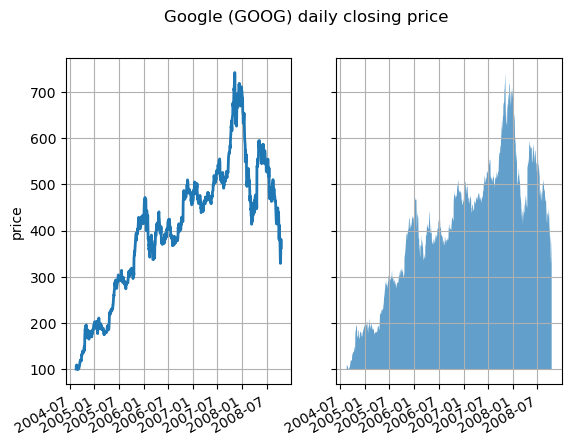

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook

# load up some sample financial data
r = (cbook.get_sample_data('goog.npz', np_load = True)['price_data']
     .view(np.recarray))

# create two subplots with the shared x and y axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True)

pricemin = r.close.min()

ax1.plot(r.date, r.close, lw = 2)
ax2.fill_between(r.date, pricemin, r.close, alpha = 0.7)

for ax in ax1, ax2:
    ax.grid(True)
    ax.label_outer()

ax1.set_ylabel('price')

fig.suptitle('Google (GOOG) daily closing price')
fig.autofmt_xdate()

**matplotlib.cbook**: 샘플 데이터에 접근하기 위한 모듈 <br/>
**np_load**: 이 옵션은 데이터 파일을 numpy 배열로 로드할지 여부를 지정합니다. <br/>
**.view**: NumPy 배열의 메서드로, 배열의 데이터를 새로운 형식으로 보기 위해 사용됩니다. <br/>
**np.recarray**: NumPy에서 제공하는 레코드 배열입니다. 레코드 배열은 각 요소가 필드로 구성된 다차원 배열로, 각 필드는 이름과 데이터 타입을 가지고 있습니다. 이런 구조를 통해 각 요소에 이름을 지정하여 필드 단위로 데이터에 접근하고 조작할 수 있습니다. <br/>
**ax.grid(True)**: 축 객체에 대해 그리드를 활성화하는 역할을 합니다. 그리드는 축에 수직 및 수평의 선으로 이루어진 배경 그리드를 의미합니다. <br/>
**ax.label_outer()**: 축 객체에 대해 바깥쪽 레이블만 표시하도록 설정하는 역할을 합니다. <br/>
**fig.autofmt_xdate()**: Figure 객체에 대해 x축의 날짜 형식을 자동으로 조정하는 역할을 합니다.

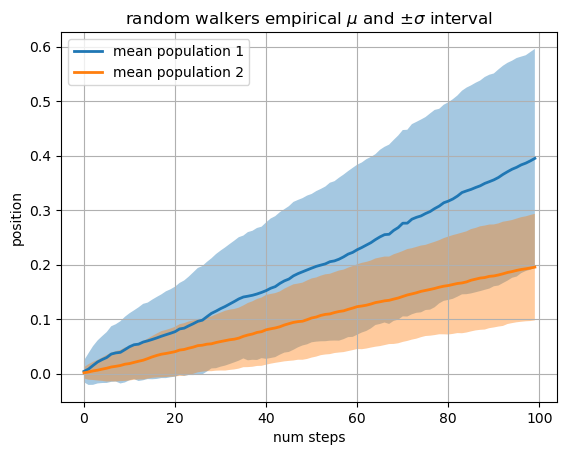

In [3]:
# Fixing random state for reproducibility
np.random.seed(19680801)

Nsteps, Nwalkers = 100, 250
t = np.arange(Nsteps)

# an (Nsteps x Nwalkers) array of random walk steps
S1 = 0.004 + 0.02 * np.random.randn(Nsteps, Nwalkers)
S2 = 0.002 + 0.01 * np.random.randn(Nsteps, Nwalkers)

# an (Nsteps x Nwalkers) array of random walker positions
X1 = S1.cumsum(axis = 0) # 누적 합산 (cumulative sum)
X2 = S2.cumsum(axis = 0)

# Nsteps length arrays empirical means and standard deviations of both
# populations over time
mu1 = X1.mean(axis = 1)
sigma1 = X1.std(axis = 1)
mu2 = X2.mean(axis = 1)
sigma2 = X2.std(axis = 1)

# plot it!
fig, ax = plt.subplots(1)
ax.plot(t, mu1, lw = 2, label = 'mean population 1')
ax.plot(t, mu2, lw = 2, label = 'mean population 2')
ax.fill_between(t, mu1 + sigma1, mu1 - sigma1, facecolor = 'C0', alpha = 0.4)
ax.fill_between(t, mu2 + sigma2, mu2 - sigma2, facecolor = 'C1', alpha = 0.4)
ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc = 'upper left')
ax.set_xlabel('num steps')
ax.set_ylabel('position')
ax.grid()

걸음 수를 구하는 정규분포의 평균과 표준편차가 다른 두 개의 무작위 보행자 모집단을 계산합니다.

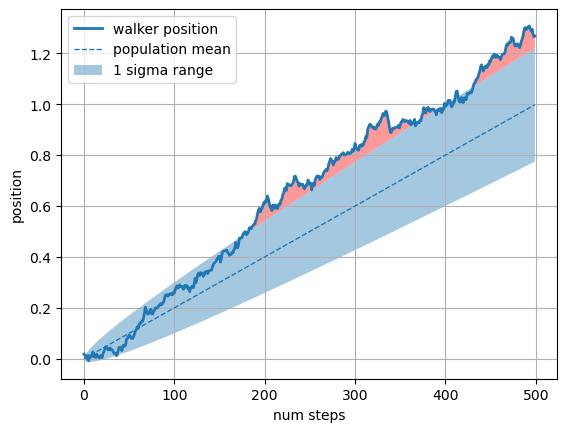

In [4]:
# Fixing random state for reproducibility
np.random.seed(1)

Nsteps = 500
t = np.arange(Nsteps)

mu = 0.002
sigma = 0.01

# the steps and position
S = mu + sigma * np.random.randn(Nsteps)
X = S.cumsum()

# the 1 sigma upper and lower analytic population bounds
lower_bound = mu * t - sigma * np.sqrt(t)
upper_bound = mu * t + sigma * np.sqrt(t)

fig,ax = plt.subplots(1)
ax.plot(t, X, lw = 2, label = 'walker position')
ax.plot(t, mu * t, lw = 1, label = 'population mean', color = 'C0', ls = '--')
ax.fill_between(t, lower_bound, upper_bound, facecolor = 'C0', alpha = 0.4,
                label = '1 sigma range')
ax.legend(loc = 'upper left')

# here we use the where argument to only fill the region where the
# walker is above the population 1 sigma boundary
ax.fill_between(t, upper_bound, X, where = X > upper_bound, fc = 'red', alpha = 0.4)
ax.fill_between(t, lower_bound, X, where = X < lower_bound, fc = 'red', alpha = 0.4)
ax.set_xlabel('num steps')
ax.set_ylabel('position')
ax.grid()

**where** 키워드 인수는 그래프의 특정 영역을 강조 표시하는 데 매우 유용합니다.

# 2. Filing the area between lines

In [5]:
import matplotlib.pyplot as plt
import numpy as np

## 2-1. Basic usage

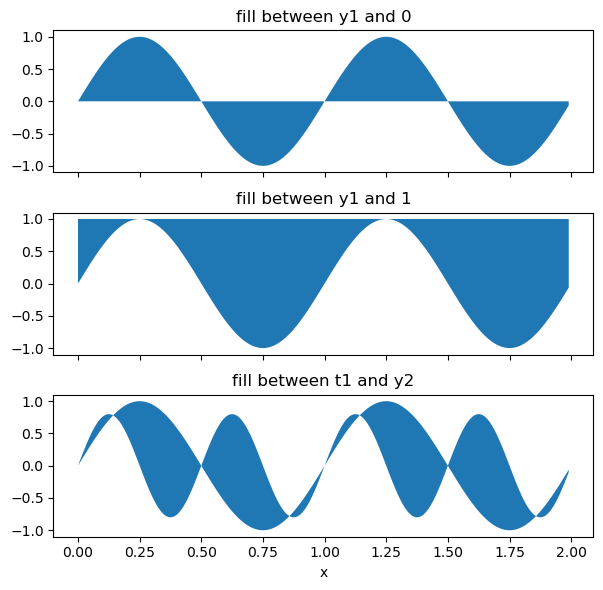

In [6]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)
y2 = 0.8 * np.sin(4 * np.pi * x)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex = True, figsize = (6, 6))

ax1.fill_between(x, y1)
ax1.set_title('fill between y1 and 0')

ax2.fill_between(x, y1, 1)
ax2.set_title('fill between y1 and 1')

ax3.fill_between(x, y1, y2)
ax3.set_title('fill between t1 and y2')
ax3.set_xlabel('x')
fig.tight_layout()

## 2.2 Examplt: Confidence bands
**fill_betweend**의 일반적인 용도는 신뢰 구간 표시입니다. <br/>
<br/>
**fill_between**은 색상 주기의 색상을 채우기 색상으로 사용합니다. 채우기 영역에 적용하면 약간 강할 수 있습니다. 따라서 투명도를 사용하여 영역을 반투명하게 만들어 색을 밝게 하는 것이 좋습니다.

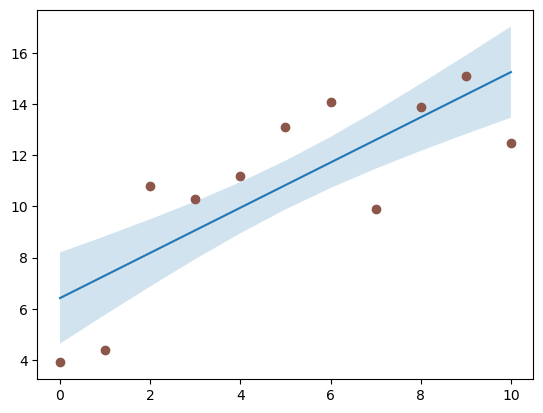

In [7]:
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1, 9.9, 13.9, 15.1, 12.5]

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg = 1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1 / len(x) + 
                          (x - x.mean()) ** 2 / np.sum((x - x.mean()) ** 2))
fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha = 0.2)
ax.plot(x, y, 'o', color = 'tab:brown')

**np.polyfit()**: 주어진 데이터에 대해 다항식으로 fitting을 수행하는 함수입니다. **deg**는 찾고자 하는 다항식의 차수(degree)입니다. 1이면 1차 다항식(직선)을 의미하고 2면 2차 다항식(포물선)을 의미합니다.

## 2-3. Selectively filling horizontal regions
where 매개변수는 채우고자 하는 x 범위를 지정하는 데 사용됩니다. 이 매개변수는 x와 동일한 크기를 가지는 불리안 배열입니다. <br/>
연속된 True 시퀀스의 x 범위만이 채워집니다. 이는 데이터 포인트가 연속적인 값을 나타내도록 하는 것이 중요한 경우에는 원하지 않는 결과입니다. 따라서 x 거리가 충분히 작아서 위의 효과가 누에 띄지 않는 경우를 제외하고는 interpolate = True로 설정하는 것이 권장됩니다. 보간(interpolation)은 where 조건이 변경될 때 실제 x 위치를 근사화하고, 해당 위치까지 채워질 수 있도록 확장합니다.

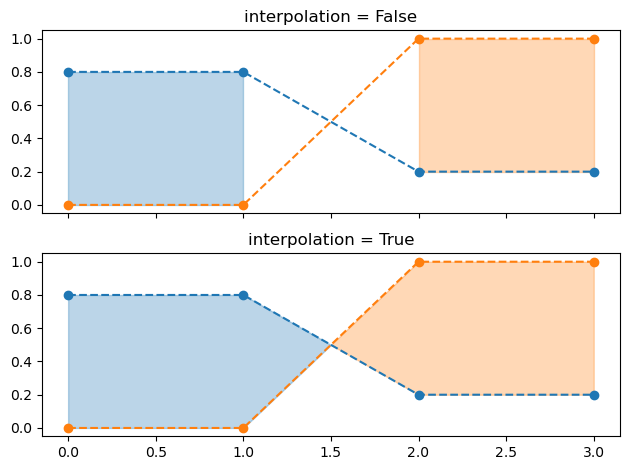

In [8]:
x = np.array([0, 1, 2, 3])
y1 = np.array([0.8, 0.8, 0.2, 0.2])
y2 = np.array([0, 0, 1, 1])

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
ax1.set_title('interpolation = False')
ax1.plot(x, y1, 'o--')
ax1.plot(x, y2, 'o--')
ax1.fill_between(x, y1, y2, where = (y1 > y2), color = 'C0', alpha = 0.3)
ax1.fill_between(x, y1, y2, where = (y1 < y2), color = 'C1', alpha = 0.3)

ax2. set_title('interpolation = True')
ax2.plot(x, y1, 'o--')
ax2.plot(x, y2, 'o--')
ax2.fill_between(x, y1, y2, where = (y1 > y2), color = 'C0', alpha = 0.3,
                 interpolate = True)
ax2.fill_between(x, y1, y2, where = (y1 <= y2), color = 'C1', alpha = 0.3,
                 interpolate = True)
fig.tight_layout()

## 2-4. Selectively marking horizontal regions across the whole Aes
동일한 선택 매커니즘을 적용하여 축의 전체 수직 높이를 채울 수 있습니다. y-한계에 독립적이기 위해 데이터 좌표의 x값과 축 좌표의 y값을 해석하는 변환을 추가합니다.

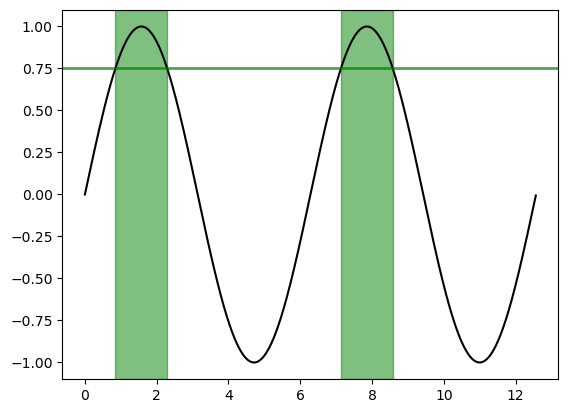

In [10]:
fig, ax = plt.subplots()
x = np.arange(0, 4 * np.pi, 0.01)
y = np.sin(x)
ax.plot(x, y, color = 'black')

threshold = 0.75
ax.axhline(threshold, color = 'green', lw = 2, alpha = 0.7)
ax.fill_between(x, 0, 1, where = y > threshold,
                color = 'green', alpha = 0.5, transform = ax.get_xaxis_transform())

# 3. Fill Betweenx Demo

Text(0.5, 1.0, 'between (x1, x2)')

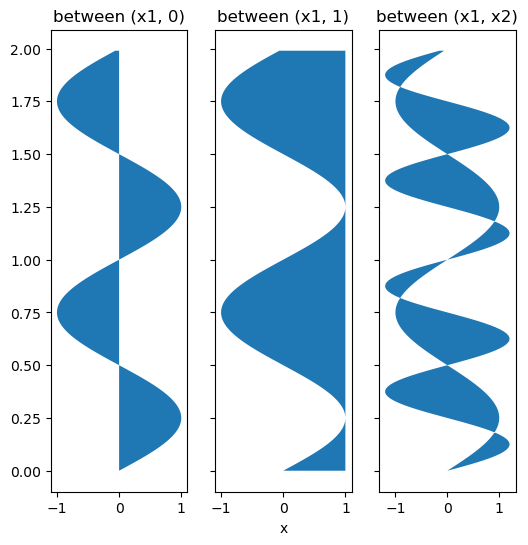

In [16]:
import matplotlib.pyplot as plt
import numpy as np

y = np.arange(0.0, 2, 0.01)
x1 = np.sin(2 * np.pi * y)
x2 = 1.2 * np.sin(4 * np.pi * y)

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, sharey = True, figsize = (6, 6))

ax1.fill_betweenx(y, x1, 0)
ax1.set_title('between (x1, 0)')

ax2.fill_betweenx(y, x1, 1)
ax2.set_title('between (x1, 1)')
ax2.set_xlabel('x')

ax3.fill_betweenx(y, x1, x2)
ax3.set_title('between (x1, x2)')

Text(0.5, 1.0, 'regions with x2 > 1 are masked')

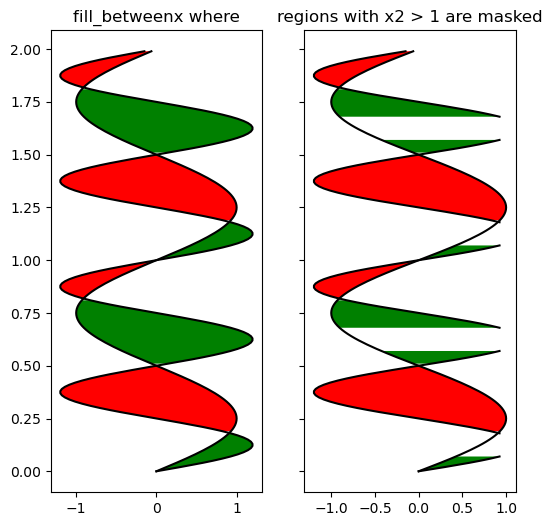

In [17]:
fig, [ax, ax1] = plt.subplots(1, 2, sharey = True, figsize = (6, 6))
ax.plot(x1, y, x2, y, color = 'black')
ax.fill_betweenx(y, x1, x2, where = x2 >= x1, facecolor = "green")
ax.fill_betweenx(y, x1, x2, where = x2 <= x1, facecolor = 'red')
ax.set_title('fill_betweenx where')

# Test support for masked arrays.
x2 = np.ma.masked_greater(x2, 1.0)
ax1.plot(x1, y, x2, y, color = 'black')
ax1.fill_betweenx(y, x1, x2, where = x2 >= x1, facecolor = 'green')
ax1.fill_betweenx(y, x1, x2, where = x2 <= x1, facecolor = 'red')
ax1.set_title('regions with x2 > 1 are masked')

이 예제는 데이터 그리드 때문에 교차점에서 원하지 않는 빈 삼각형이 발생하는 문제를 보여줍니다. 일반적인 해결책은 플로팅하기 전에 모든 배열을 매우 잘게 나눈 그리드로 보간(interpolate)하는 것입니다.

# 4. Hatch-filled histograms

In [18]:
import itertools
from functools import partial

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cycler import cycler

def filled_hist(ax, edges, values, bottoms = None, orientation = 'v', **kwargs):
    """
    Draw a histogram as a stepped patch.

    parameters
    ----------
    ax: Axes
        The axes to plot to
    
    edges: array
        A length n+1 array giving the left edges of each bin and the
        right edge of the last bin.

    values: array
        A length n array of bin counts or values

    bottoms: float or array, optional
        A length n array of the bottom of the bars. If None, zero is used.

    orientation: {'v', 'h'}
        Orientation of the histogram. 'v' (default) has
        the bars increasing in the positive y-direction.

    **kwargs
        Extra keyword arguments are passed through to '.fill_between'.

    Returns
    ----------
    ret: PolyCollection
        Artist added to the Axes
    """
    print(orientation)
    if orientation not in 'hv':
        raise ValueError(f"orientation must be in {{'h', 'v'}} "
                         f"not {orientation}")
    
    kwargs.setdefault('step', 'post')
    kwargs.setdefault('alpha', 0.7)
    edges = np.asarray(edges)
    values = np.asarray(values)
    if len(edges) - 1 != len(values):
        raise ValueError(f'Must provide one more bin edge than value not: '
                         f'{len(edges)=} {len(values)=}')
    
    if bottoms is None:
        bottoms = 0
    bottoms = np.broadcast_to(bottoms, values.shape)

    values = np.append(values, values[-1])
    bottoms = np.append(bottoms, bottoms[-1])
    if orientation == 'h':
        return ax.fill_betweenx(edges, values, bottoms, **kwargs)
    
    elif orientation == 'v':
        return ax.fill_between(edges, values, bottoms, **kwargs)
    
    else: 
        raise AssertionError("you should never be here")

def stack_hist(ax, stacked_data, sty_cycle, bottoms = None,
               hist_func = None, labels = None,
               plot_func = None, plot_kwargs = None):
    """
    parameters
    ----------
    ax: axes.Axes
        The axes to add artists too

    stacked_data: array or Mapping
        A (M, N) shaped array. The first dimension will be iterated over to
        compute histograms row-wise

    sty_cycle: Cycler or operable of dict
        Style to apply to each set

    bottoms: array, default: 0
        The initial positions of the bottoms.

    hist_func: callable, optional
        Must have signature 'bin_vals, bin_edges = f(data)',
        'bin_edges' expected to be one longer than 'bin_vals'

    labels: list of str, optional
        The label for each set.

        If not given and stacked data is an array defaults to 'default set {n}'2023-06-19-barcolor.ipynb

        If *stacked_data* is a mapping, and *labels* is None, default to the keys.

        If *stacked_data* is a mapping and *labels* is given then only the
        columns listed will be plotted.

    plot_func: callable, optional
        Function to call to draw the histogram must have signature:

            ret = plot_func(ax, edges, top, bottoms = bottoms,
                            label = label, **kwargs)
        
    plot_kwargs: dict, optinal
        Any extra keyword arguments to pass through to the plotting function.
        This will be the same for all calls to the plotting function and will
        override the values in *sty_cycle*.

    Returns
    -------
    arts: dict
        Dictionary of artists keyed on their labels
    """

    # deal with default binning function
    if hist_func is None:
        hist_func = np.histogram
    
    # deal with default plotting function
    if plot_func is None:
        plot_func = filled_hist

    # deal with default
    if plot_kwargs is None:
        plot_kwargs = {}
    print(plot_kwargs)
    try:
        l_keys = stacked_data.keys()
        label_data = True
        if labels is None:
            labels = l_keys

    except AttributeError:
        label_data = False
        if labels is None:
            labels = itertools.repeat(None)

    if label_data:
        loop_iter = enumerate((stacked_data[lab], lab, s)
                              for lab, s in zip(labels, sty_cycle))
    else:
        loop_iter = enumerate(zip(stacked_data, labels, sty_cycle))

    arts = {}
    for j, (data, label, sty) in loop_iter:
        if label is None:
            label = f'dflt set {j}'
        label = sty.pop('label', label)
        vals, edges = hist_func(data)
        if bottoms is None:
            bottoms = np.zeros_like(vals)
        top = bottoms + vals
        print(sty)
        sty.update(plot_kwargs)
        print(sty)
        ret = plot_func(ax, edges, top, bottoms = bottoms,
                        label = label, **sty)
        bottoms = top
        arts[label] = ret
    ax.legend(fontsize = 10)
    return arts

# set up histogram function to fixed bins
edges = np.linspace(-3, 3, 20, endpoint = True)
hist_func = partial(np.histogram, bins = edges)

# set up style cycles
color_cycle = cycler(facecolor = plt.rcParams['axes.prop_cycle'][:4])
label_cycle = cycler(label = [f'set {n}' for n in range(4)])
hatch_cycle = cycler(hatch = ['/', '*', '+', '|'])

# Fixing random state for reproducibility
np.random.seed(19680801)

stack_data = np.random.randn(4, 12250)
dict_data = dict(zip((c['label'] for c in label_cycle), stack_data))

**from cycler import cycler**: 그래프 요소의 스타일 및 속성을 순환적으로 설정하는 데 사용됩니다. 그래프의 색상, 선 스타일, 마커, 선 굵기 등 다양한 스타일을 일괄적으로 조정할 수 있습니다. <br/>
<br/>
**np.asarray()**: 입력 데이터를 NumPy 배열로 변환하는 함수입니다. 주어진 입력을 배열로 변환하되, 이미 입력이 배열인 경우에는 새로운 배열을 생성하지 않고 해당 배열을 반환합니다. <br/>
<br/>
**np.broadcast_to()**: 입력 배열을 지정한 형태(shape)로 브로드캐스트(broadcast)하여 반환하는 함수입니다. 브로드캐스트는 NumPy에서 배열 간의 연산을 수행할 때, 배열의 형태를 맞추기 위해 자동으로 배열을 확장하는 기능을 말합니다. <br/>
<br/>
**np.append()**: 주어진 배열에 새로운 요소나 배열을 추가하는 함수입니다. 주어진 배열에 새로운 요소나 배열을 끝에 추가하고, 그 결과로 새로운 배열을 반환합니다. <br/>
<br/>
**itertools.repeat()**: 지정된 요소나 값을 반복적으로 생성하는 이터레이터(iterator)를 생성하는 함수입니다. 주어진 요소나 값을 반복하여 동일한 값을 무한히 생성하는 것이 특징입니다. <br/>
<br/>
**np.zeros_like()**: 주어진 배열과 동일한 shape(크기와 차원)를 가지며, 모든 요소가 0으로 초기화된 배열을 생성하는 함수입니다. 주어진 배열과 동일한 크기와 차원을 가지며 모든 요소가 0인 배열을 반환합니다. <br/>
<br/>
**np.linspace()**: 시작점부터 끝점까지를 지정된 개수로 일정하게 나눈 값을 가지는 등간격으로 이루어진 1차원 배열을 생성하는 함수입니다. 시작점과 끝점을 지정하여 그 사이를 지정된 개수로 균등하게 나눈 값을 가지는 배열을 생성합니다. <br/>
<br/>

{}
{'facecolor': '#1f77b4', 'hatch': '/'}
{'facecolor': '#1f77b4', 'hatch': '/'}
v
{'facecolor': '#ff7f0e', 'hatch': '*'}
{'facecolor': '#ff7f0e', 'hatch': '*'}
v
{'facecolor': '#2ca02c', 'hatch': '+'}
{'facecolor': '#2ca02c', 'hatch': '+'}
v
{'facecolor': '#d62728', 'hatch': '|'}
{'facecolor': '#d62728', 'hatch': '|'}
v
{'edgecolor': 'w', 'orientation': 'h'}
{'facecolor': '#1f77b4'}
{'facecolor': '#1f77b4', 'edgecolor': 'w', 'orientation': 'h'}
h
{'facecolor': '#ff7f0e'}
{'facecolor': '#ff7f0e', 'edgecolor': 'w', 'orientation': 'h'}
h
{'facecolor': '#2ca02c'}
{'facecolor': '#2ca02c', 'edgecolor': 'w', 'orientation': 'h'}
h
{'facecolor': '#d62728'}
{'facecolor': '#d62728', 'edgecolor': 'w', 'orientation': 'h'}
h


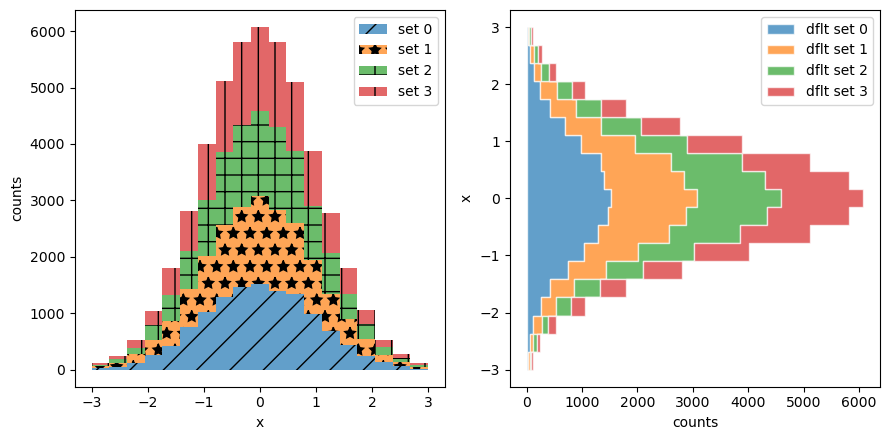

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9, 4.5), tight_layout = True)
arts = stack_hist(ax1, stack_data, color_cycle + label_cycle + hatch_cycle,
                  hist_func = hist_func)

arts = stack_hist(ax2, stack_data, color_cycle,
                  hist_func = hist_func,
                  plot_kwargs = dict(edgecolor = 'w', orientation = 'h'))
ax1.set_ylabel('counts')
ax1.set_xlabel('x')
ax2.set_xlabel('counts')
ax2.set_ylabel('x')
plt.show()

{}
{'facecolor': '#1f77b4', 'hatch': '/'}
{'facecolor': '#1f77b4', 'hatch': '/'}
v
{'facecolor': '#ff7f0e', 'hatch': '*'}
{'facecolor': '#ff7f0e', 'hatch': '*'}
v
{'facecolor': '#2ca02c', 'hatch': '+'}
{'facecolor': '#2ca02c', 'hatch': '+'}
v
{'facecolor': '#d62728', 'hatch': '|'}
{'facecolor': '#d62728', 'hatch': '|'}
v
{}
{'facecolor': '#1f77b4', 'hatch': '/'}
{'facecolor': '#1f77b4', 'hatch': '/'}
v
{'facecolor': '#ff7f0e', 'hatch': '*'}
{'facecolor': '#ff7f0e', 'hatch': '*'}
v


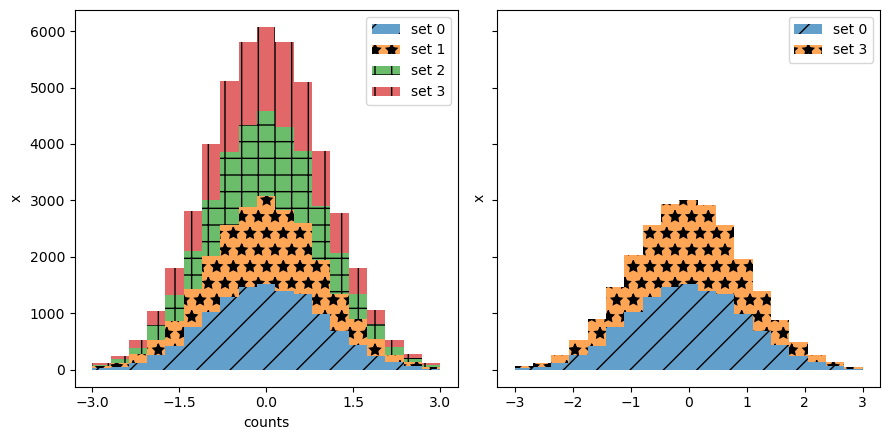

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9, 4.5),
                               tight_layout = True, sharey = True)

arts = stack_hist(ax1, dict_data, color_cycle + hatch_cycle,
                  hist_func = hist_func)

arts = stack_hist(ax2, dict_data, color_cycle + hatch_cycle,
                  hist_func = hist_func, labels = ['set 0', 'set 3'])

ax1.xaxis.set_major_locator(mticker.MaxNLocator(5))
ax1.set_xlabel('counts')
ax1.set_ylabel('x')
ax2.set_ylabel('x')

plt.show()